In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sentiment=pd.read_csv('/content/fear_greed_index.csv')
trades=pd.read_csv('/content/historical_data.csv')

/tmp/ipython-input-3709102576.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades=pd.read_csv('/content/historical_data.csv')


In [9]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [13]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [12]:
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [15]:
sentiment['classification']=sentiment['classification'].str.strip().str.capitalize()

# Task
Analyze the relationship between trading performance and market sentiment using the `historical_data.csv` and `fear_greed_index.csv` datasets, specifically by analyzing performance metrics grouped by sentiment classification and identifying correlations between trading patterns and sentiment.

**Reasoning**:
The first step is to convert the 'Timestamp IST' column in the `trades` DataFrame to a datetime object and then extract only the date part to a new 'date' column. This will allow for merging with the `sentiment` DataFrame on a common 'date' column.



In [6]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')
trades['date'] = trades['Timestamp IST'].dt.date
print("Converted 'Timestamp IST' to datetime and extracted 'date' column in 'trades' dataframe.")
print(trades.head())

Converted 'Timestamp IST' to datetime and extracted 'date' column in 'trades' dataframe.
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   

In [9]:
trades['date'] = pd.to_datetime(trades['date']).dt.normalize()
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.normalize()
merged_df = pd.merge(trades, sentiment, on='date', how='inner')
print("Merged 'trades' and 'sentiment' dataframes on 'date' column.")
print(merged_df.head())

Merged 'trades' and 'sentiment' dataframes on 'date' column.
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                  

**Reasoning**:
Now that the dataframes are merged, I need to calculate the average 'Closed PnL' for each 'classification' as specified in the subtask instructions.



In [10]:
average_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean()
print("Average 'Closed PnL' by Sentiment Classification:")
print(average_pnl_by_sentiment)

Average 'Closed PnL' by Sentiment Classification:
classification
Extreme Fear     64.813875
Extreme Greed    67.997940
Fear             71.790600
Greed            33.256985
Neutral          47.280244
Name: Closed PnL, dtype: float64


**Reasoning**:
The next step is to calculate the win rate for each unique sentiment classification. This involves counting trades with a positive 'Closed PnL' and dividing by the total trades for each classification.



In [11]:
total_trades_by_sentiment = merged_df.groupby('classification').size()
winning_trades_by_sentiment = merged_df[merged_df['Closed PnL'] > 0].groupby('classification').size()

win_rate_by_sentiment = (winning_trades_by_sentiment / total_trades_by_sentiment).fillna(0)

print("Win Rate by Sentiment Classification:")
print(win_rate_by_sentiment)

Win Rate by Sentiment Classification:
classification
Extreme Fear     0.353796
Extreme Greed    0.448989
Fear             0.436800
Greed            0.366075
Neutral          0.412825
dtype: float64


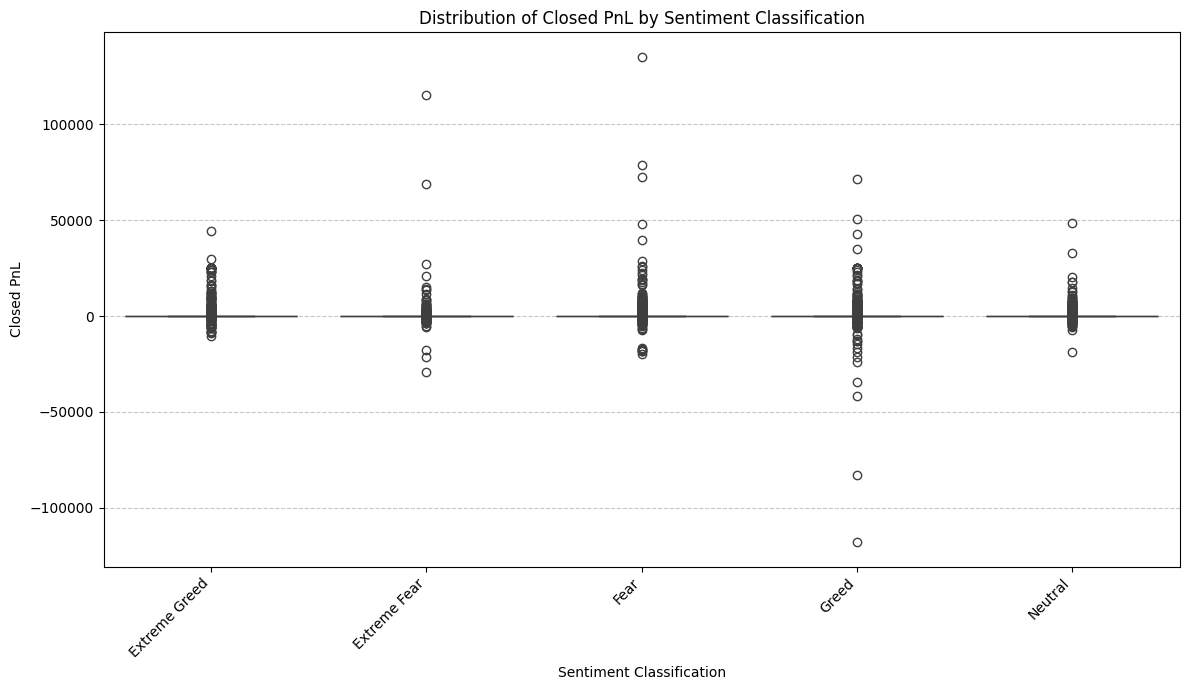

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Distribution of Closed PnL by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [13]:
pnl_by_side_sentiment = merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()
print("Average 'Closed PnL' by Sentiment Classification and Trade Side:")
print(pnl_by_side_sentiment)

Average 'Closed PnL' by Sentiment Classification and Trade Side:
Side                  BUY        SELL
classification                       
Extreme Fear    66.915207   62.150855
Extreme Greed   12.739832  115.901450
Fear            88.211953   55.410437
Greed            9.143408   58.510610
Neutral         48.299540   46.140140


<Figure size 1200x700 with 0 Axes>

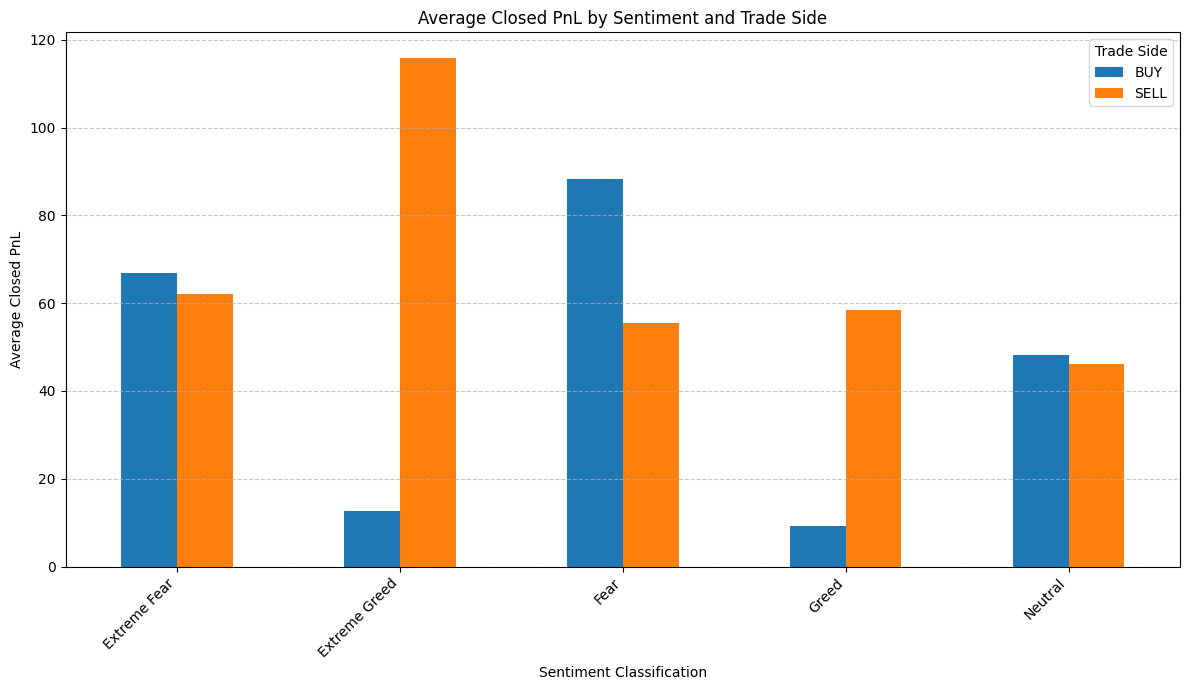

In [14]:
plt.figure(figsize=(12, 7))
pnl_by_side_sentiment.plot(kind='bar', figsize=(12, 7))
plt.title('Average Closed PnL by Sentiment and Trade Side')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Trade Side')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

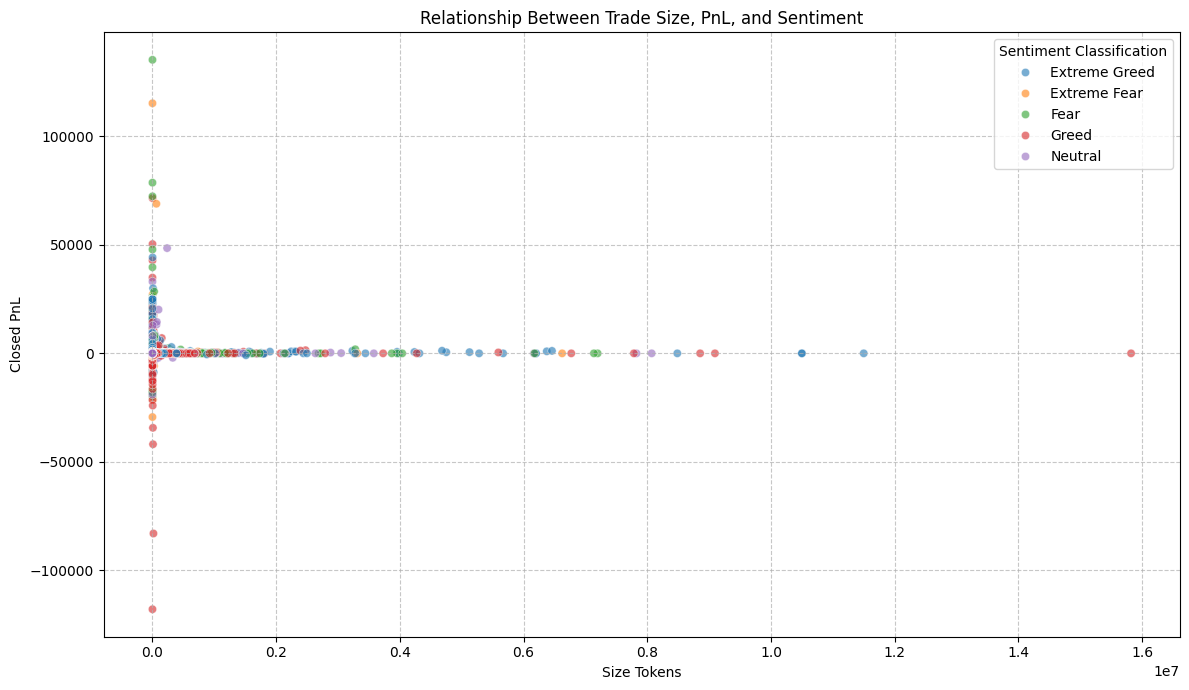

In [15]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Size Tokens', y='Closed PnL', hue='classification', data=merged_df, alpha=0.6)
plt.title('Relationship Between Trade Size, PnL, and Sentiment')
plt.xlabel('Size Tokens')
plt.ylabel('Closed PnL')
plt.legend(title='Sentiment Classification')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()